# Task-3 (Unupervised Learning - Clustering)

In this task we are going to predict optimum number of clusters in 'Iris' dataset and represent it visually. As it is 
clustering problem so we are going to use K-Means clustering algorithm so predict the clusters. Also we are going to
find the appropriate number of clusters for Kmeans by using Elbow method and Silhouette coefficients method.

# Importing all the required libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Loading the iris dataset

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Looking for NaN values

In [3]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Printing statistical description of the dataset

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


As there are no nan values present in our dataset so we can move ahead and see how many classes of 
species is present in our dataset.

# Let's see the number of unique classes present in the target column.

In [5]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Now let's prepare our dataset for fitting into kmeans algorithm
Here we will separate the number of columns that we are going to use in Kmeans algorithm.

In [6]:
data1 = data.iloc[:,:5].values

# Feature scaling

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data1)
scaled_features

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

# Choosing the appropriate number of clusters.
By Elbow method and silhouette coefficients method.

# Elbow Method
To perform the elbow mrthod, run several k means by incrementing value of k with each iteration and record SSE value for each.

In [8]:
k_kwargs = {'init':'random',
           'n_init':10,
           'max_iter':300,
           'random_state':None}

#Initialize an empty list which will hold the SSE values for each iteration.
sse =[]

# Now let's iterate through 1-10 n_clusters and apply kmeans on each.
for k in range(1,11):
    # Instantiating kmeans class for each n_cluster value.
    km_elbow = KMeans(n_clusters=k, **k_kwargs)
    # Fitting the scaled features into kmeans.
    km_elbow.fit(scaled_features)
    # Appending the lowest sse value to sse list.
    sse.append(km_elbow.inertia_)


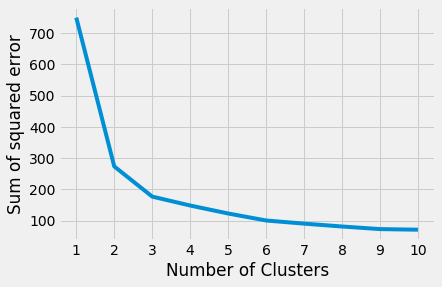

In [9]:
# Plotting the SSE curve
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.grid(True)
plt.show()

So here we can see that the number of cluster is 3 as per our sse curve.

# Silhouette Coefficients Method

Silhouette coefficient values ranges b/w -1 and 1. Larger numbers indicates that samples are closer to their 
clusters than they are to other clusters.

To find silhouette coefficients loop through values of k again but this time instead of computing SSE, compute silhouette
coefficients

In [10]:
k_kwargs = {'init':'random',
           'n_init':10,
           'max_iter':300,
           'random_state':None}

# Initialize the list which is going to hold value of silhouette coefficients for each k.
silhouette_coeff = []

# Start with 2 clusters otherwise silhouette score will raise an error.
for k in range(2,11):
    # Instantiating kmeans class for each n_cluster value.
    km_silhouette = KMeans(n_clusters = k, **k_kwargs)
     # Fitting the scaled features into kmeans.
    km_silhouette.fit(scaled_features)
    # Estimating the silhouette score
    score = silhouette_score(scaled_features, km_silhouette.labels_)
    # Appending the silhouette score in silhouette coefficients list 
    silhouette_coeff.append(score)



In [11]:
print(silhouette_coeff)

[0.570815210603504, 0.452949780355554, 0.40728293227535856, 0.32081884171398156, 0.288277943334602, 0.32201127418233405, 0.31942567689937634, 0.29026851674324505, 0.31500983159212625]


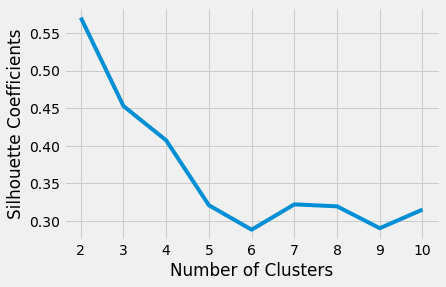

In [12]:
#Plotting the silhouette coefficients.
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.grid(True)
plt.show()

So by using Silhouette coeffiecients also the number of clusters are 3. 

Now that we have the appropriate number of clusters for our keans algorithm, we can move ahead for the fitting part.

# Applying Kmeans algorithm on the iris dataset.

In [13]:
kmeans = KMeans(init= "random",
               n_clusters = 3,
               n_init = 10,
               max_iter = 300,
               random_state=None)

kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Statistics from initialization run with lowest SSE

In [14]:
#The lowest SSE value
print('The lowest SSE value is :',kmeans.inertia_)
print('______________________________________________________________________________________________________')
#Final locations of the centroid
print('Final locations of centroid are:',kmeans.cluster_centers_)
print('______________________________________________________________________________________________________')
#The number of iterations required to converge
print('The number of iterations required to converge',kmeans.n_iter_)
print('______________________________________________________________________________________________________')
# Cluster Assignments
print('The cluster assignments are:',kmeans.labels_)

The lowest SSE value is : 177.05608895062974
______________________________________________________________________________________________________
Final locations of centroid are: [[ 0.07560189  0.03894137 -0.73184462  0.30676007  0.21508647]
 [-1.1547262  -1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.14317894  1.03542672 -0.07079946  1.04224753  1.09269889]]
______________________________________________________________________________________________________
The number of iterations required to converge 6
______________________________________________________________________________________________________
The cluster assignments are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
#Compute cluster centers and predict cluster index for each sample.
kmeans_fit_predict = kmeans.fit_predict(scaled_features)

# Visual representation of the clusters
Here we are going to plot the clusters we received from kmeans algorithm.

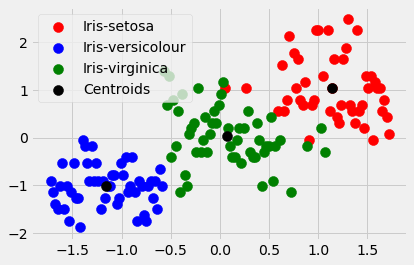

In [16]:
# Plotting the clusters
plt.scatter(scaled_features[kmeans_fit_predict == 0, 0], scaled_features[kmeans_fit_predict == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled_features[kmeans_fit_predict == 1, 0], scaled_features[kmeans_fit_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled_features[kmeans_fit_predict == 2, 0], scaled_features[kmeans_fit_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroid of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the model

Here we are going to use the adjusted rand index to evaluate our model. The value of adjusted rand index lies between -1 and 1.
A value closer to 0 indicates random assignments and value closer to 1 indicates perfectly labeled clusters.

In [17]:
from sklearn.metrics import adjusted_rand_score
# Taking the species column as true clusters in adjusted rand score.
data2 = data.iloc[:,-1].values
ari = adjusted_rand_score(data2 ,kmeans.labels_)
print('The adjusted rand index of our Kmeans model is: ',ari)

The adjusted rand index of our Kmeans model is:  0.8681109348039796
